In [4]:
import os
import time

import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re

from copo import pretty_print

%matplotlib inline

In [5]:
EVALUATE_RESULTS_PATH = "./train5m_evaluate_results/"

os.listdir(EVALUATE_RESULTS_PATH)

['Algo-copo_dist_Env-Bottle_Seed-9000_Ckpt-625.csv',
 'Algo-ippo_Env-Inter_Seed-12000_Ckpt-470.csv',
 'Algo-ippo_Env-Tollgate_Seed-11000_Ckpt-3125.csv',
 'Algo-copo_ccppo_concat_Env-Inter_Seed-9000_Ckpt-450.csv',
 'Algo-copo_dist_Env-Parking_Seed-11000_Ckpt-450.csv',
 'Algo-ippo_Env-Inter_Seed-7000_Ckpt-860.csv',
 'Algo-copo_ccppo_concat_Env-Tollgate_Seed-7000_Ckpt-625.csv',
 'Algo-copo_dist_Env-PGMap_Seed-11000_Ckpt-470.csv',
 'Algo-ippo_Env-Parking_Seed-10000_Ckpt-2510.csv',
 'Algo-copo_dist_Env-Inter_Seed-9000_Ckpt-450.csv',
 'Algo-copo_ccppo_Env-Bottle_Seed-11000_Ckpt-580.csv',
 'Algo-copo_dist_Env-Tollgate_Seed-12000_Ckpt-610.csv',
 'Algo-copo_dist_Env-Parking_Seed-5000_Ckpt-625.csv',
 'Algo-ippo_Env-Round_Seed-12000_Ckpt-1770.csv',
 'Algo-copo_ccppo_concat_Env-Tollgate_Seed-7000_Ckpt-590.csv',
 'Algo-copo_dist_Env-Inter_Seed-12000_Ckpt-620.csv',
 'Algo-copo_dist_Env-Round_Seed-6000_Ckpt-625.csv',
 'Algo-ippo_Env-Parking_Seed-8000_Ckpt-2630.csv',
 'Algo-ippo_Env-Round_Seed-5000_Ck

In [6]:
eval_df = []

algo_set = set()
env_set = set()

count = 0

for p in os.listdir(EVALUATE_RESULTS_PATH):
    match = re.search("Algo-(.*?)_Env", p)
    
    if match:
        
        count += 1
        
        algo = match[1]
        env = re.search("Env-(.*?)_", p)[1]
        seed = re.search("Seed-(.*?)_", p)[1]
        ckpt = re.search("Ckpt-(.*?).csv", p)[1]
        
        full_p = os.path.abspath(os.path.join(EVALUATE_RESULTS_PATH, p))
        
        try:
            tmp = pd.read_csv(full_p)
        except Exception as e:
            print(full_p)
            raise e
        tmp["env"] = env
        tmp["seed"] = seed
        tmp["ckpt"] = ckpt
        tmp["model_index"] = p
        
        eval_df.append(tmp)
        
        print(f"[{count}] Processed the agent: Algo={algo}, Env={env}, Seed={seed}, Ckpt={ckpt}")
    else:
        print(p, " not exists!")
                
eval_df = pd.concat(eval_df)

[1] Processed the agent: Algo=copo_dist, Env=Bottle, Seed=9000, Ckpt=625
[2] Processed the agent: Algo=ippo, Env=Inter, Seed=12000, Ckpt=470
[3] Processed the agent: Algo=ippo, Env=Tollgate, Seed=11000, Ckpt=3125
[4] Processed the agent: Algo=copo_ccppo_concat, Env=Inter, Seed=9000, Ckpt=450
[5] Processed the agent: Algo=copo_dist, Env=Parking, Seed=11000, Ckpt=450
[6] Processed the agent: Algo=ippo, Env=Inter, Seed=7000, Ckpt=860
[7] Processed the agent: Algo=copo_ccppo_concat, Env=Tollgate, Seed=7000, Ckpt=625
[8] Processed the agent: Algo=copo_dist, Env=PGMap, Seed=11000, Ckpt=470
[9] Processed the agent: Algo=ippo, Env=Parking, Seed=10000, Ckpt=2510
[10] Processed the agent: Algo=copo_dist, Env=Inter, Seed=9000, Ckpt=450
[11] Processed the agent: Algo=copo_ccppo, Env=Bottle, Seed=11000, Ckpt=580
[12] Processed the agent: Algo=copo_dist, Env=Tollgate, Seed=12000, Ckpt=610
[13] Processed the agent: Algo=copo_dist, Env=Parking, Seed=5000, Ckpt=625
[14] Processed the agent: Algo=ippo, 

[116] Processed the agent: Algo=copo_dist, Env=Round, Seed=7000, Ckpt=450
[117] Processed the agent: Algo=copo_dist, Env=Inter, Seed=8000, Ckpt=625
[118] Processed the agent: Algo=ippo, Env=Bottle, Seed=6000, Ckpt=920
[119] Processed the agent: Algo=ippo, Env=Round, Seed=9000, Ckpt=3125
[120] Processed the agent: Algo=copo_ccppo, Env=Bottle, Seed=6000, Ckpt=600
[121] Processed the agent: Algo=copo_dist, Env=PGMap, Seed=7000, Ckpt=625
[122] Processed the agent: Algo=copo_ccppo, Env=Parking, Seed=12000, Ckpt=550
.DS_Store  not exists!
[123] Processed the agent: Algo=copo_ccppo_concat, Env=Inter, Seed=8000, Ckpt=625
[124] Processed the agent: Algo=copo_ccppo_concat, Env=Bottle, Seed=8000, Ckpt=625
[125] Processed the agent: Algo=copo_dist, Env=Parking, Seed=10000, Ckpt=625
[126] Processed the agent: Algo=copo_ccppo_concat, Env=Parking, Seed=6000, Ckpt=520
[127] Processed the agent: Algo=copo_ccppo_concat, Env=PGMap, Seed=7000, Ckpt=625
[128] Processed the agent: Algo=copo_dist, Env=Tollga

[229] Processed the agent: Algo=copo_ccppo_concat, Env=Parking, Seed=12000, Ckpt=610
[230] Processed the agent: Algo=ippo, Env=PGMap, Seed=6000, Ckpt=2020
[231] Processed the agent: Algo=copo_ccppo_concat, Env=Round, Seed=9000, Ckpt=240
[232] Processed the agent: Algo=ippo, Env=Tollgate, Seed=10000, Ckpt=2400
[233] Processed the agent: Algo=ippo, Env=Tollgate, Seed=5000, Ckpt=1900
[234] Processed the agent: Algo=copo_ccppo_concat, Env=Round, Seed=5000, Ckpt=400
copo_Inter_6000_490.csv  not exists!
[235] Processed the agent: Algo=copo_ccppo, Env=Inter, Seed=9000, Ckpt=580
[236] Processed the agent: Algo=copo_ccppo, Env=Tollgate, Seed=7000, Ckpt=600
[237] Processed the agent: Algo=copo_dist, Env=Bottle, Seed=5000, Ckpt=600
[238] Processed the agent: Algo=ippo, Env=Tollgate, Seed=5000, Ckpt=3125
[239] Processed the agent: Algo=copo_ccppo, Env=Round, Seed=8000, Ckpt=625
[240] Processed the agent: Algo=ippo, Env=Tollgate, Seed=9000, Ckpt=2550
[241] Processed the agent: Algo=copo_ccppo, Env=

[340] Processed the agent: Algo=copo_dist, Env=Round, Seed=10000, Ckpt=620
[341] Processed the agent: Algo=copo_ccppo_concat, Env=PGMap, Seed=10000, Ckpt=610
[342] Processed the agent: Algo=copo_ccppo_concat, Env=Round, Seed=8000, Ckpt=430
[343] Processed the agent: Algo=copo_dist, Env=PGMap, Seed=9000, Ckpt=620
[344] Processed the agent: Algo=ippo, Env=Inter, Seed=11000, Ckpt=280
[345] Processed the agent: Algo=copo_ccppo_concat, Env=Round, Seed=6000, Ckpt=480
[346] Processed the agent: Algo=copo_ccppo, Env=Bottle, Seed=12000, Ckpt=600
[347] Processed the agent: Algo=ippo, Env=Round, Seed=8000, Ckpt=3125
[348] Processed the agent: Algo=copo_ccppo, Env=PGMap, Seed=9000, Ckpt=590
[349] Processed the agent: Algo=copo_dist, Env=Bottle, Seed=9000, Ckpt=480
[350] Processed the agent: Algo=copo_ccppo, Env=Inter, Seed=8000, Ckpt=520
[351] Processed the agent: Algo=ippo, Env=Parking, Seed=7000, Ckpt=2900
[352] Processed the agent: Algo=copo_dist, Env=Inter, Seed=9000, Ckpt=420
[353] Processed 

[449] Processed the agent: Algo=copo_dist, Env=Inter, Seed=11000, Ckpt=550
[450] Processed the agent: Algo=copo_dist, Env=Inter, Seed=5000, Ckpt=520
[451] Processed the agent: Algo=copo_ccppo, Env=Bottle, Seed=7000, Ckpt=620
[452] Processed the agent: Algo=copo_dist, Env=Round, Seed=6000, Ckpt=510
[453] Processed the agent: Algo=copo_ccppo_concat, Env=Inter, Seed=5000, Ckpt=520
[454] Processed the agent: Algo=copo_ccppo_concat, Env=Tollgate, Seed=11000, Ckpt=625
[455] Processed the agent: Algo=copo_ccppo_concat, Env=Parking, Seed=10000, Ckpt=610
[456] Processed the agent: Algo=copo_ccppo_concat, Env=Round, Seed=10000, Ckpt=510
[457] Processed the agent: Algo=copo_dist, Env=Round, Seed=12000, Ckpt=625
[458] Processed the agent: Algo=copo_ccppo_concat, Env=Round, Seed=12000, Ckpt=450
[459] Processed the agent: Algo=copo_ccppo, Env=Parking, Seed=5000, Ckpt=330
[460] Processed the agent: Algo=copo_dist, Env=Tollgate, Seed=11000, Ckpt=600
[461] Processed the agent: Algo=copo_ccppo, Env=Bott

[557] Processed the agent: Algo=ippo, Env=Parking, Seed=9000, Ckpt=3125
[558] Processed the agent: Algo=copo_ccppo, Env=Round, Seed=5000, Ckpt=540
[559] Processed the agent: Algo=copo_dist, Env=Round, Seed=6000, Ckpt=500
[560] Processed the agent: Algo=copo_ccppo, Env=Tollgate, Seed=10000, Ckpt=490
[561] Processed the agent: Algo=copo_ccppo, Env=PGMap, Seed=6000, Ckpt=610
[562] Processed the agent: Algo=copo_dist, Env=Inter, Seed=7000, Ckpt=470
[563] Processed the agent: Algo=copo_dist, Env=Inter, Seed=11000, Ckpt=540
[564] Processed the agent: Algo=copo_ccppo, Env=Round, Seed=10000, Ckpt=540
[565] Processed the agent: Algo=copo_dist, Env=Tollgate, Seed=7000, Ckpt=570
[566] Processed the agent: Algo=copo_dist, Env=Bottle, Seed=5000, Ckpt=590
[567] Processed the agent: Algo=ippo, Env=Inter, Seed=11000, Ckpt=260
[568] Processed the agent: Algo=copo_dist, Env=Inter, Seed=5000, Ckpt=450
[569] Processed the agent: Algo=copo_dist, Env=Bottle, Seed=9000, Ckpt=500
[570] Processed the agent: Al

[672] Processed the agent: Algo=ippo, Env=Bottle, Seed=8000, Ckpt=2420
[673] Processed the agent: Algo=copo_dist, Env=Tollgate, Seed=9000, Ckpt=610
[674] Processed the agent: Algo=ippo, Env=Bottle, Seed=8000, Ckpt=2390
[675] Processed the agent: Algo=ippo, Env=PGMap, Seed=8000, Ckpt=710
[676] Processed the agent: Algo=copo_ccppo_concat, Env=Bottle, Seed=8000, Ckpt=600
[677] Processed the agent: Algo=ippo, Env=Round, Seed=8000, Ckpt=2730
[678] Processed the agent: Algo=ippo, Env=Round, Seed=5000, Ckpt=3125
[679] Processed the agent: Algo=copo_ccppo_concat, Env=Inter, Seed=7000, Ckpt=560
[680] Processed the agent: Algo=ippo, Env=PGMap, Seed=8000, Ckpt=3125
[681] Processed the agent: Algo=copo_ccppo, Env=Bottle, Seed=6000, Ckpt=625
[682] Processed the agent: Algo=ippo, Env=Round, Seed=12000, Ckpt=1790
[683] Processed the agent: Algo=copo_ccppo, Env=PGMap, Seed=12000, Ckpt=580
[684] Processed the agent: Algo=copo_ccppo_concat, Env=Tollgate, Seed=8000, Ckpt=610
[685] Processed the agent: Al

[785] Processed the agent: Algo=copo_dist, Env=Round, Seed=12000, Ckpt=480
[786] Processed the agent: Algo=copo_ccppo_concat, Env=PGMap, Seed=8000, Ckpt=610
[787] Processed the agent: Algo=copo_ccppo, Env=PGMap, Seed=5000, Ckpt=390
[788] Processed the agent: Algo=ippo, Env=Parking, Seed=12000, Ckpt=3125
[789] Processed the agent: Algo=ippo, Env=Parking, Seed=5000, Ckpt=2530
[790] Processed the agent: Algo=copo_ccppo, Env=Round, Seed=11000, Ckpt=625
[791] Processed the agent: Algo=copo_ccppo_concat, Env=Bottle, Seed=7000, Ckpt=610
[792] Processed the agent: Algo=copo_dist, Env=Inter, Seed=10000, Ckpt=625
[793] Processed the agent: Algo=copo_dist, Env=Round, Seed=11000, Ckpt=610
[794] Processed the agent: Algo=copo_ccppo_concat, Env=PGMap, Seed=11000, Ckpt=620
[795] Processed the agent: Algo=copo_dist, Env=PGMap, Seed=8000, Ckpt=610
[796] Processed the agent: Algo=copo_ccppo_concat, Env=Tollgate, Seed=7000, Ckpt=600
[797] Processed the agent: Algo=ippo, Env=Tollgate, Seed=8000, Ckpt=2830

In [7]:
eval_df.keys()

Index(['Unnamed: 0', 'velocity_step_mean_episode_min',
       'velocity_step_mean_episode_mean', 'velocity_step_mean_episode_max',
       'energy_step_mean_episode_min', 'energy_step_mean_episode_mean',
       'energy_step_mean_episode_max', 'num_neighbours_mean_episode_mean',
       'num_neighbours_mean_episode_max', 'num_agents_total',
       'num_agents_total_per_300_steps', 'success_rate', 'num_agents_success',
       'num_agents_success_per_300_steps', 'num_agents_failed_per_300_steps',
       'episode_reward_mean', 'episode_reward_min', 'episode_reward_max',
       'episode_cost_mean', 'episode_cost_min', 'episode_cost_max',
       'episode_cost_sum', 'crash_rate', 'num_agents_crash', 'out_rate',
       'num_agents_out', 'episode_length_mean', 'success_episode_length_mean',
       'svo_estimate_deg_mean', 'svo_estimate_deg_min', 'svo_estimate_deg_max',
       'svo_reward', 'episode', 'env', 'path', 'count', 'algo', 'seed',
       'trial', 'trial_path', 'should_wrap_copo_env', 'sh

In [10]:
final_plot_data_from_eval_data = []


# === Success Rate: Number of successes / Number of spawn agents ===
# This value is recorded directly by evaluation script!
stat_key = "success_rate"
print_key = "Competence"
for env, gb_env in eval_df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            val = gbb[stat_key].mean()
            assert np.isscalar(val)
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            print(env, algo, val)
            

# === Efficiency: The net successes in one episode ===
# Though we may have different episode length, we use 1000 steps as a general episode length.
# The "net successes" is the total number of successes minus total number of failures.
eval_df["fixed_efficiency"] = (
    eval_df["num_agents_success"] - eval_df["num_agents_crash"] - eval_df["num_agents_out"]
) / 1000
stat_key = "fixed_efficiency"
print_key = "Efficiency"
for env, gb_env in eval_df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            val = gbb[stat_key].mean()
            assert np.isscalar(val)
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            

# === Safety: How many failures happen in one episode. ===
# Failure means an agent terminates without reaching destination.
eval_df["num_failed"] = eval_df["num_agents_crash"] + eval_df["num_agents_out"]
stat_key = "num_failed"
print_key = "Safety"
for env, gb_env in eval_df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            
            val = gbb[stat_key].mean()
            print("Env {}, Algo {}, Model {}, Val {:.3f} (Suc {:.3f}, "
                  "Eff {:.3f} Saf {:.3f}), total num agent {:.3f}"
                  .format(
                env, algo, model_index, val, gbb.success_rate.mean(), 
                gbb["fixed_efficiency"].mean(),
                gbb["num_failed"].mean(),
                gbb["num_agents_total"].mean(),
            ))

            val = -val
            
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            

Bottle copo_ccppo 0.4312244067649682
Bottle copo_ccppo 0.43509922950657026
Bottle copo_ccppo 0.4384568105243393
Bottle copo_ccppo 0.4290692613197221
Bottle copo_ccppo 0.4307307653298351
Bottle copo_ccppo 0.4328091472970556
Bottle copo_ccppo 0.43389568647951404
Bottle copo_ccppo 0.4308778575767141
Bottle copo_ccppo 0.43332122545695007
Bottle copo_ccppo 0.4352168099365496
Bottle copo_ccppo 0.437319871875802
Bottle copo_ccppo 0.4185998694524566
Bottle copo_ccppo 0.4546005425358844
Bottle copo_ccppo 0.45526845361408125
Bottle copo_ccppo 0.45859999326075696
Bottle copo_ccppo 0.489626277517141
Bottle copo_ccppo 0.4978887719845703
Bottle copo_ccppo 0.5035600985672724
Bottle copo_ccppo 0.43103635911420496
Bottle copo_ccppo 0.4293264717869943
Bottle copo_ccppo 0.4273127713192423
Bottle copo_ccppo 0.42504772623537623
Bottle copo_ccppo 0.40632888065511436
Bottle copo_ccppo 0.4112081294488507
Bottle copo_ccppo 0.41608885516283967
Bottle copo_ccppo 0.4197668071508784
Bottle copo_ccppo 0.41953921919

PGMap copo_ccppo 0.43961096723487564
PGMap copo_ccppo 0.4403981216513052
PGMap copo_ccppo 0.4384604621300107
PGMap copo_ccppo 0.43586657389803124
PGMap copo_ccppo 0.43079643157608893
PGMap copo_ccppo 0.42774113773512384
PGMap copo_ccppo 0.42472887620177785
PGMap copo_ccppo 0.4346203664938526
PGMap copo_ccppo 0.4319539838773259
PGMap copo_ccppo 0.42932011812197635
PGMap copo_ccppo 0.42332307070223724
PGMap copo_ccppo 0.39308570850922026
PGMap copo_ccppo 0.3668799946086056
PGMap copo_ccppo 0.3445447702223472
PGMap copo_ccppo 0.4888047280252053
PGMap copo_ccppo 0.47483887865305663
PGMap copo_ccppo 0.4616489098015828
PGMap copo_ccppo 0.44917191223937786
PGMap copo_ccppo 0.41807744147076004
PGMap copo_ccppo 0.41069240761395864
PGMap copo_ccppo 0.4034872776558191
PGMap copo_ccppo 0.3965306004548566
PGMap copo_ccppo 0.4106608807782282
PGMap copo_ccppo 0.40546895162783575
PGMap copo_ccppo 0.4005821689774204
PGMap copo_ccppo 0.3955643214035702
PGMap copo_ccppo 0.4147206166297369
PGMap copo_ccpp

Round copo_ccppo 0.3344586164675293
Round copo_ccppo 0.36995198690909364
Round copo_ccppo 0.45064701483821384
Round copo_ccppo 0.46065943998110503
Round copo_ccppo 0.46929955833855014
Round copo_ccppo 0.47895007748796786
Round copo_ccppo 0.4241678270386811
Round copo_ccppo 0.4276418900795963
Round copo_ccppo 0.43332867989453316
Round copo_ccppo 0.39076235273145443
Round copo_ccppo 0.39526256128920606
Round copo_ccppo 0.39872623847115973
Round copo_ccppo 0.40269318166052626
Round copo_ccppo 0.4150574451183483
Round copo_ccppo 0.4174329459473536
Round copo_ccppo 0.41928922302808064
Round copo_ccppo 0.42191935509054695
Round copo_ccppo_concat 0.3415143062195814
Round copo_ccppo_concat 0.3438773829720739
Round copo_ccppo_concat 0.3434878822237453
Round copo_ccppo_concat 0.34540445993111696
Round copo_ccppo_concat 0.34448177468359964
Round copo_ccppo_concat 0.34635239512881916
Round copo_ccppo_concat 0.34855351092134146
Round copo_ccppo_concat 0.35074511138011655
Round copo_ccppo_concat 0.3

Env Bottle, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Bottle_Seed-10000_Ckpt-610.csv, Val 62.877 (Suc 0.431, Eff -0.006 Saf 62.877), total num agent 119.639
Env Bottle, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Bottle_Seed-10000_Ckpt-620.csv, Val 62.437 (Suc 0.435, Eff -0.005 Saf 62.437), total num agent 119.441
Env Bottle, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Bottle_Seed-10000_Ckpt-625.csv, Val 62.050 (Suc 0.438, Eff -0.005 Saf 62.050), total num agent 119.259
Env Bottle, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Bottle_Seed-11000_Ckpt-560.csv, Val 64.844 (Suc 0.429, Eff -0.009 Saf 64.844), total num agent 120.558
Env Bottle, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Bottle_Seed-11000_Ckpt-570.csv, Val 64.638 (Suc 0.431, Eff -0.009 Saf 64.638), total num agent 120.451
Env Bottle, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Bottle_Seed-11000_Ckpt-580.csv, Val 64.401 (Suc 0.433, Eff -0.008 Saf 64.401), total num agent 120.387
Env Bottle, Algo copo_ccppo, Model Algo-copo_ccppo_E

Env Bottle, Algo ippo, Model Algo-ippo_Env-Bottle_Seed-10000_Ckpt-1240.csv, Val 32.226 (Suc 0.587, Eff 0.042 Saf 32.226), total num agent 106.450
Env Bottle, Algo ippo, Model Algo-ippo_Env-Bottle_Seed-10000_Ckpt-1250.csv, Val 32.117 (Suc 0.589, Eff 0.042 Saf 32.117), total num agent 106.518
Env Bottle, Algo ippo, Model Algo-ippo_Env-Bottle_Seed-10000_Ckpt-1260.csv, Val 31.999 (Suc 0.591, Eff 0.042 Saf 31.999), total num agent 106.553
Env Bottle, Algo ippo, Model Algo-ippo_Env-Bottle_Seed-10000_Ckpt-3125.csv, Val 32.017 (Suc 0.591, Eff 0.042 Saf 32.017), total num agent 106.493
Env Bottle, Algo ippo, Model Algo-ippo_Env-Bottle_Seed-11000_Ckpt-2520.csv, Val 31.690 (Suc 0.593, Eff 0.043 Saf 31.690), total num agent 106.131
Env Bottle, Algo ippo, Model Algo-ippo_Env-Bottle_Seed-11000_Ckpt-2530.csv, Val 31.590 (Suc 0.594, Eff 0.043 Saf 31.590), total num agent 106.146
Env Bottle, Algo ippo, Model Algo-ippo_Env-Bottle_Seed-11000_Ckpt-2540.csv, Val 31.515 (Suc 0.596, Eff 0.043 Saf 31.515), to

Env Inter, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Inter_Seed-9000_Ckpt-570.csv, Val 65.356 (Suc 0.418, Eff -0.009 Saf 65.356), total num agent 121.755
Env Inter, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Inter_Seed-9000_Ckpt-580.csv, Val 65.039 (Suc 0.421, Eff -0.008 Saf 65.039), total num agent 121.826
Env Inter, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Inter_Seed-9000_Ckpt-625.csv, Val 64.680 (Suc 0.425, Eff -0.007 Saf 64.680), total num agent 121.824
Env Inter, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-Inter_Seed-10000_Ckpt-580.csv, Val 76.640 (Suc 0.342, Eff -0.029 Saf 76.640), total num agent 124.348
Env Inter, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-Inter_Seed-10000_Ckpt-590.csv, Val 76.360 (Suc 0.345, Eff -0.028 Saf 76.360), total num agent 124.473
Env Inter, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-Inter_Seed-10000_Ckpt-600.csv, Val 76.177 (Suc 0.348, Eff -0.027 Saf 76.177), total num agent 124.654
Env Inter, Algo copo_ccpp

Env Inter, Algo ippo, Model Algo-ippo_Env-Inter_Seed-11000_Ckpt-260.csv, Val 31.863 (Suc 0.582, Eff 0.040 Saf 31.863), total num agent 103.978
Env Inter, Algo ippo, Model Algo-ippo_Env-Inter_Seed-11000_Ckpt-270.csv, Val 31.807 (Suc 0.583, Eff 0.040 Saf 31.807), total num agent 103.985
Env Inter, Algo ippo, Model Algo-ippo_Env-Inter_Seed-11000_Ckpt-280.csv, Val 31.805 (Suc 0.584, Eff 0.040 Saf 31.805), total num agent 104.052
Env Inter, Algo ippo, Model Algo-ippo_Env-Inter_Seed-11000_Ckpt-3125.csv, Val 31.959 (Suc 0.584, Eff 0.040 Saf 31.959), total num agent 104.185
Env Inter, Algo ippo, Model Algo-ippo_Env-Inter_Seed-12000_Ckpt-3125.csv, Val 31.915 (Suc 0.582, Eff 0.041 Saf 31.915), total num agent 104.614
Env Inter, Algo ippo, Model Algo-ippo_Env-Inter_Seed-12000_Ckpt-470.csv, Val 31.811 (Suc 0.580, Eff 0.041 Saf 31.811), total num agent 104.327
Env Inter, Algo ippo, Model Algo-ippo_Env-Inter_Seed-12000_Ckpt-480.csv, Val 31.807 (Suc 0.581, Eff 0.041 Saf 31.807), total num agent 104.4

Env PGMap, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-PGMap_Seed-10000_Ckpt-590.csv, Val 73.275 (Suc 0.355, Eff -0.023 Saf 73.275), total num agent 122.863
Env PGMap, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-PGMap_Seed-10000_Ckpt-600.csv, Val 73.185 (Suc 0.353, Eff -0.024 Saf 73.185), total num agent 122.412
Env PGMap, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-PGMap_Seed-10000_Ckpt-610.csv, Val 73.154 (Suc 0.351, Eff -0.024 Saf 73.154), total num agent 121.991
Env PGMap, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-PGMap_Seed-10000_Ckpt-625.csv, Val 73.145 (Suc 0.348, Eff -0.024 Saf 73.145), total num agent 121.588
Env PGMap, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-PGMap_Seed-11000_Ckpt-550.csv, Val 76.036 (Suc 0.349, Eff -0.027 Saf 76.036), total num agent 124.937
Env PGMap, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-PGMap_Seed-11000_Ckpt-560.csv, Val 75.960 (Suc 0.347, Eff -0.027 Saf 75.960), tota

Env PGMap, Algo ippo, Model Algo-ippo_Env-PGMap_Seed-8000_Ckpt-710.csv, Val 32.265 (Suc 0.595, Eff 0.043 Saf 32.265), total num agent 107.766
Env PGMap, Algo ippo, Model Algo-ippo_Env-PGMap_Seed-8000_Ckpt-720.csv, Val 32.723 (Suc 0.588, Eff 0.042 Saf 32.723), total num agent 107.385
Env PGMap, Algo ippo, Model Algo-ippo_Env-PGMap_Seed-8000_Ckpt-730.csv, Val 33.219 (Suc 0.582, Eff 0.041 Saf 33.219), total num agent 107.055
Env PGMap, Algo ippo, Model Algo-ippo_Env-PGMap_Seed-9000_Ckpt-3125.csv, Val 32.207 (Suc 0.581, Eff 0.041 Saf 32.207), total num agent 105.106
Env PGMap, Algo ippo, Model Algo-ippo_Env-PGMap_Seed-9000_Ckpt-740.csv, Val 31.800 (Suc 0.597, Eff 0.043 Saf 31.800), total num agent 106.568
Env PGMap, Algo ippo, Model Algo-ippo_Env-PGMap_Seed-9000_Ckpt-750.csv, Val 32.073 (Suc 0.591, Eff 0.042 Saf 32.073), total num agent 106.197
Env PGMap, Algo ippo, Model Algo-ippo_Env-PGMap_Seed-9000_Ckpt-760.csv, Val 32.319 (Suc 0.586, Eff 0.041 Saf 32.319), total num agent 105.808
Env P

Env Parking, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-Parking_Seed-7000_Ckpt-400.csv, Val 64.372 (Suc 0.363, Eff -0.016 Saf 64.372), total num agent 112.938
Env Parking, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-Parking_Seed-7000_Ckpt-410.csv, Val 63.957 (Suc 0.356, Eff -0.016 Saf 63.957), total num agent 111.490
Env Parking, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-Parking_Seed-7000_Ckpt-420.csv, Val 63.694 (Suc 0.348, Eff -0.017 Saf 63.694), total num agent 110.231
Env Parking, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-Parking_Seed-7000_Ckpt-625.csv, Val 63.216 (Suc 0.342, Eff -0.018 Saf 63.216), total num agent 108.827
Env Parking, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-Parking_Seed-8000_Ckpt-470.csv, Val 76.386 (Suc 0.334, Eff -0.031 Saf 76.386), total num agent 121.214
Env Parking, Algo copo_ccppo_concat, Model Algo-copo_ccppo_concat_Env-Parking_Seed-8000_Ckpt-480.csv, Val 76.725 (Suc 0.330, Eff -0.032

Env Round, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Round_Seed-10000_Ckpt-470.csv, Val 63.916 (Suc 0.422, Eff -0.007 Saf 63.916), total num agent 120.060
Env Round, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Round_Seed-10000_Ckpt-530.csv, Val 63.595 (Suc 0.425, Eff -0.007 Saf 63.595), total num agent 119.925
Env Round, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Round_Seed-10000_Ckpt-540.csv, Val 63.365 (Suc 0.427, Eff -0.007 Saf 63.365), total num agent 119.812
Env Round, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Round_Seed-10000_Ckpt-625.csv, Val 63.289 (Suc 0.428, Eff -0.006 Saf 63.289), total num agent 119.840
Env Round, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Round_Seed-11000_Ckpt-290.csv, Val 64.788 (Suc 0.425, Eff -0.010 Saf 64.788), total num agent 119.798
Env Round, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Round_Seed-11000_Ckpt-300.csv, Val 64.950 (Suc 0.425, Eff -0.010 Saf 64.950), total num agent 120.066
Env Round, Algo copo_ccppo, Model Algo-copo_ccppo_Env-Round_Seed

Env Round, Algo ippo, Model Algo-ippo_Env-Round_Seed-10000_Ckpt-2950.csv, Val 31.991 (Suc 0.593, Eff 0.043 Saf 31.991), total num agent 106.717
Env Round, Algo ippo, Model Algo-ippo_Env-Round_Seed-10000_Ckpt-2960.csv, Val 32.004 (Suc 0.594, Eff 0.043 Saf 32.004), total num agent 106.949
Env Round, Algo ippo, Model Algo-ippo_Env-Round_Seed-10000_Ckpt-2970.csv, Val 32.027 (Suc 0.595, Eff 0.043 Saf 32.027), total num agent 107.204
Env Round, Algo ippo, Model Algo-ippo_Env-Round_Seed-10000_Ckpt-3125.csv, Val 31.942 (Suc 0.597, Eff 0.043 Saf 31.942), total num agent 107.349
Env Round, Algo ippo, Model Algo-ippo_Env-Round_Seed-11000_Ckpt-2970.csv, Val 31.475 (Suc 0.598, Eff 0.043 Saf 31.475), total num agent 106.446
Env Round, Algo ippo, Model Algo-ippo_Env-Round_Seed-11000_Ckpt-2980.csv, Val 31.473 (Suc 0.599, Eff 0.044 Saf 31.473), total num agent 106.696
Env Round, Algo ippo, Model Algo-ippo_Env-Round_Seed-11000_Ckpt-2990.csv, Val 31.461 (Suc 0.601, Eff 0.044 Saf 31.461), total num agent 

Env Tollgate, Algo ippo, Model Algo-ippo_Env-Tollgate_Seed-6000_Ckpt-3125.csv, Val 28.821 (Suc 0.572, Eff 0.043 Saf 28.821), total num agent 100.966
Env Tollgate, Algo ippo, Model Algo-ippo_Env-Tollgate_Seed-7000_Ckpt-2740.csv, Val 30.269 (Suc 0.562, Eff 0.038 Saf 30.269), total num agent 98.698
Env Tollgate, Algo ippo, Model Algo-ippo_Env-Tollgate_Seed-7000_Ckpt-2750.csv, Val 30.126 (Suc 0.568, Eff 0.040 Saf 30.126), total num agent 100.208
Env Tollgate, Algo ippo, Model Algo-ippo_Env-Tollgate_Seed-7000_Ckpt-2780.csv, Val 30.305 (Suc 0.571, Eff 0.041 Saf 30.305), total num agent 101.694
Env Tollgate, Algo ippo, Model Algo-ippo_Env-Tollgate_Seed-7000_Ckpt-3125.csv, Val 30.266 (Suc 0.576, Eff 0.042 Saf 30.266), total num agent 103.023
Env Tollgate, Algo ippo, Model Algo-ippo_Env-Tollgate_Seed-8000_Ckpt-2830.csv, Val 32.992 (Suc 0.569, Eff 0.038 Saf 32.992), total num agent 103.773
Env Tollgate, Algo ippo, Model Algo-ippo_Env-Tollgate_Seed-8000_Ckpt-2840.csv, Val 32.707 (Suc 0.574, Eff 0

In [11]:
final_plot_data_to_plot = pd.DataFrame(final_plot_data_from_eval_data)

final_plot_data_to_plot

,env,algo,model_index,stat_key,print_key,value
0,Bottle,copo_ccppo,Algo-copo_ccppo_Env-Bottle_Seed-10000_Ckpt-610...,success_rate,Competence,0.431224
1,Bottle,copo_ccppo,Algo-copo_ccppo_Env-Bottle_Seed-10000_Ckpt-620...,success_rate,Competence,0.435099
2,Bottle,copo_ccppo,Algo-copo_ccppo_Env-Bottle_Seed-10000_Ckpt-625...,success_rate,Competence,0.438457
3,Bottle,copo_ccppo,Algo-copo_ccppo_Env-Bottle_Seed-11000_Ckpt-560...,success_rate,Competence,0.429069
4,Bottle,copo_ccppo,Algo-copo_ccppo_Env-Bottle_Seed-11000_Ckpt-570...,success_rate,Competence,0.430731
...,...,...,...,...,...,...
2398,Tollgate,ippo,Algo-ippo_Env-Tollgate_Seed-8000_Ckpt-3125.csv,num_failed,Safety,-32.306707
2399,Tollgate,ippo,Algo-ippo_Env-Tollgate_Seed-9000_Ckpt-2550.csv,num_failed,Safety,-32.582039
2400,Tollgate,ippo,Algo-ippo_Env-Tollgate_Seed-9000_Ckpt-2560.csv,num_failed,Safety,-32.434135
2401,Tollgate,ippo,Algo-ippo_Env-Tollgate_Seed-9000_Ckpt-2570.csv,num_failed,Safety,-32.287619


In [13]:
final_plot_data_to_plot.to_csv("train5m_evaluate_results.csv")

In [7]:
final_plot_data_to_plot.algo.unique()

array(['cl_new_1m', 'copo_ccppo', 'copo_ccppo_concat', 'copo_dist',
       'ippo'], dtype=object)

In [8]:
final_plot_data_to_plot.env.unique()

array(['Bottle', 'Inter', 'PGMap', 'Parking', 'Round', 'Tollgate'],
      dtype=object)

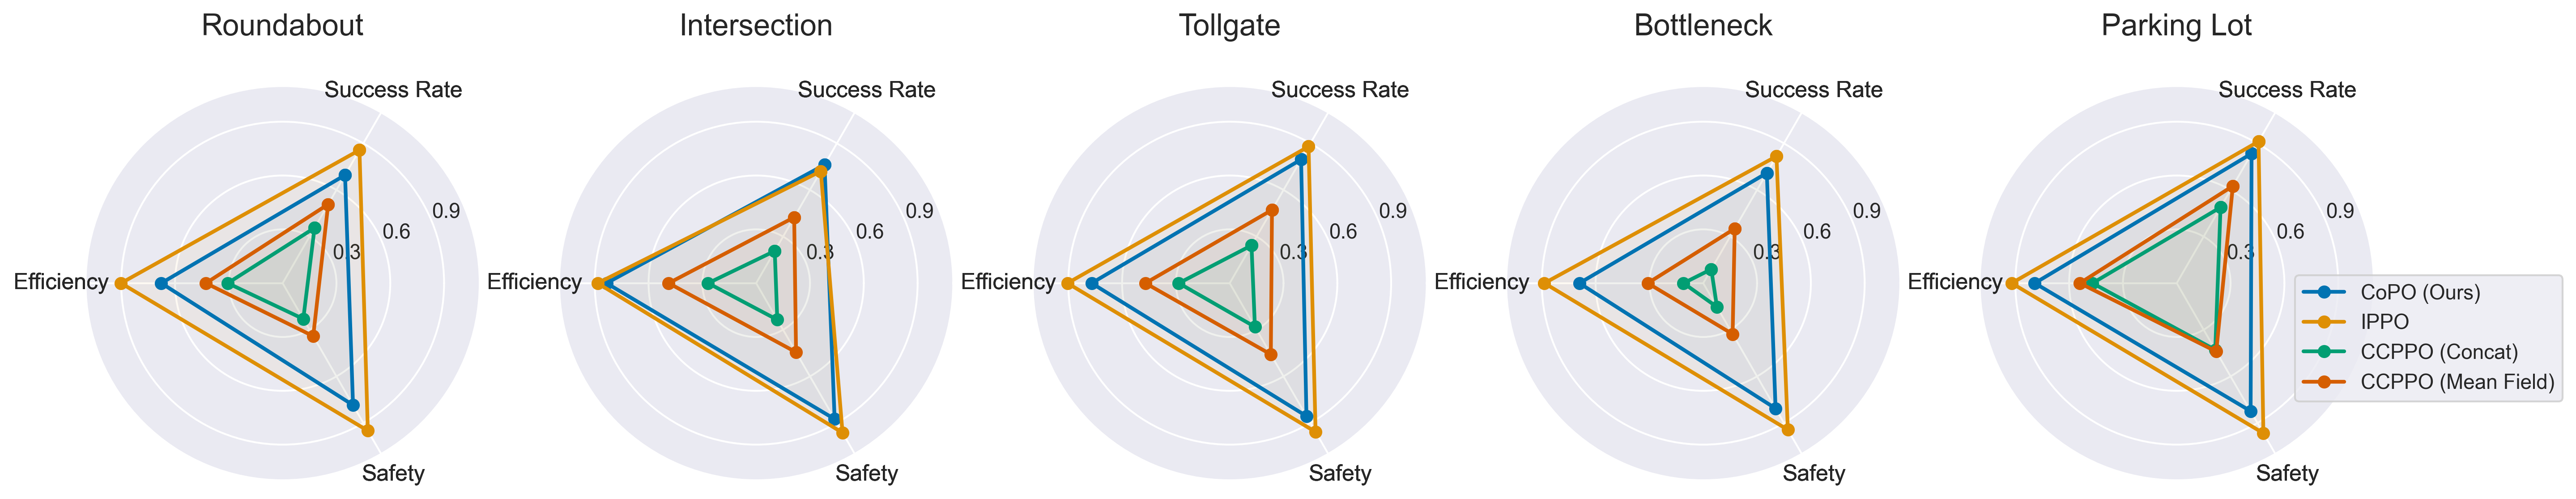

In [14]:
# Normalize each metric
new_df = []
for env, gb in final_plot_data_to_plot.groupby("env"):
    for k, gbb in gb.groupby("print_key"):
        val = gbb.value
        # print(f"Env {env}, Algo {algo}, Key {k}, val min {val.min()}, val max {val.max()}")
        val = (val - val.min()) / (val.max() - val.min())
        gb.loc[gb.print_key == k, "value"] = val
    new_df.append(gb)
final_plot_data_to_plot = pd.concat(new_df)


sns.set("notebook", "darkgrid")
c = sns.color_palette("colorblind")


# Rename and reorder environments and algorithms
env_mapping = {
    "Bottle": "Bottleneck",
    "Tollgate": "Tollgate",
    "Inter": "Intersection",
    "Round": "Roundabout",
    "Parking": "Parking Lot",
    "PGMap": "PG Map"
}

algo_mapping = {
    "copo_dist": "CoPO (Ours)",
    "ippo": "IPPO",
    "copo_ccppo_concat": "CCPPO (Concat)",
    "copo_ccppo": "CCPPO (Mean Field)",
}

env_order = ["Round", "Inter", "Tollgate", "Bottle", "Parking"]

# matplotlib.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(dpi=300, figsize=(22, 6))  

for env_count, env in enumerate(env_order):
    env_plot_data = final_plot_data_to_plot[final_plot_data_to_plot.env == env] 

    ax = fig.add_subplot(1, 5, env_count + 1, polar=True)
    
    for algo_count, algo in enumerate(algo_mapping.keys()):
        algo_plot_data = env_plot_data[env_plot_data.algo == algo]
    
        labels = ["Competence", "Efficiency", "Safety"]
        plot_labels = ["Success Rate", "Efficiency", "Safety"]
        
        stats = [algo_plot_data[algo_plot_data.print_key == k].value.mean() for k in labels]
        
        angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)+ np.pi/2 - np.pi / 6
        stats = np.concatenate((stats, [stats[0]]))
        angles = np.concatenate((angles, [angles[0]]))

        ax.plot(angles, stats, 'o-', linewidth=2, label=algo_mapping[algo], c=c[algo_count])
        ax.fill(angles, stats, alpha=0.05, c=c[algo_count])
        ax.set_ylim(0, 1.1)
        
        # print("Env {}, Algo {}, {}, {}".format(env, algo, angles, plot_labels))
        ax.set_thetagrids(angles[:3] * 180/np.pi, plot_labels)
        
        ax.tick_params(pad=0)

        plt.gcf().canvas.draw()
        labels = []
        angles2 = [0, 0, 0]
        for label, angle in zip(ax.get_xticklabels(), angles2):
            x,y = label.get_position()
            lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
                          ha=label.get_ha(), va=label.get_va(),
                          fontname=label.get_fontname(),
                          fontstyle="normal",
                          fontweight="light"
                         )
            lab.set_rotation(angle)
        ax.set_xticklabels([])
        ax.set_yticks([0.3, 0.6, 0.9])
        ax.set_title(env_mapping[env], size=16, y=1.1)
        
ax.legend(loc=(0.8, 0.2))
fig.savefig("evaluate_result_5m.pdf".format(env), format='pdf', dpi=300, bbox_inches = "tight")
fig.savefig("evaluate_result_5m.png".format(env), format='png', dpi=300, bbox_inches = "tight")


In [10]:
for (env, algo, key), gb in final_plot_data_to_plot.groupby(["env", "algo", "print_key"]):
    print(env, algo, key, gb["value"].mean())

Bottle cl_new_1m Competence 0.17145851983141208
Bottle cl_new_1m Efficiency 0.29167339842820694
Bottle cl_new_1m Safety 0.3087043405045908
Bottle copo_ccppo Competence 0.49772027589006135
Bottle copo_ccppo Efficiency 0.6006896329414981
Bottle copo_ccppo Safety 0.6504627095982844
Bottle copo_ccppo_concat Competence 0.29542586463896625
Bottle copo_ccppo_concat Efficiency 0.48546636606357674
Bottle copo_ccppo_concat Safety 0.5595571385237331
Bottle copo_dist Competence 0.774824677431104
Bottle copo_dist Efficiency 0.821074212234325
Bottle copo_dist Safety 0.8993588413678726
Bottle ippo Competence 0.8581442485023464
Bottle ippo Efficiency 0.9338712109600582
Bottle ippo Safety 0.9706343951527332
Inter cl_new_1m Competence 0.20725065114146596
Inter cl_new_1m Efficiency 0.25623813342351853
Inter cl_new_1m Safety 0.2607143789303319
Inter copo_ccppo Competence 0.5095894403836129
Inter copo_ccppo Efficiency 0.587056348998066
Inter copo_ccppo Safety 0.5774321116205541
Inter copo_ccppo_concat Comp